In [1]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2022, 8, 6)
stocks_data = pd.read_csv('Stocks_processed.csv', index_col='<DATE>').drop(columns=['Unnamed: 0'])

In [ ]:
stocks_data

,CHFUSD_lrr,GOLD_lrr,EURUSD_lrr,BRENT_lrr,GAS_lrr,PL_lrr,RUBUSD_lrr,SPY_lrr
<DATE>,,,,,,,,
03/01/19,0.002473,0.004094,0.004652,0.015786,0.004803,0.009322,0.003656,-0.025068
04/01/19,0.001284,-0.008516,0.000377,0.033109,0.037284,0.022267,0.013339,0.033759
07/01/19,0.006982,-0.006752,0.006802,-0.003641,0.010373,-0.009521,0.015553,0.006986
08/01/19,-0.001765,-0.000545,-0.003194,0.017562,-0.001666,0.000968,-0.004553,0.009649
09/01/19,0.008212,0.010618,0.009907,0.045868,-0.003675,0.005189,0.002413,0.004090
...,...,...,...,...,...,...,...,...
27/12/21,0.001928,0.002761,0.000574,0.032578,0.029549,-0.001651,-0.000736,0.013744
28/12/21,0.000028,-0.003315,-0.001457,0.002541,-0.001224,0.009456,-0.003687,-0.001011
29/12/21,0.003553,-0.001107,0.004049,0.004810,-0.054108,-0.009973,-0.004888,0.001401


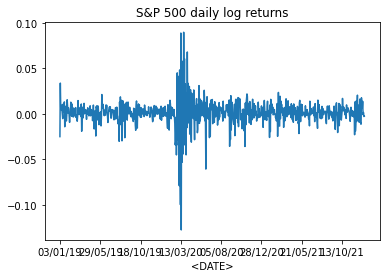

In [ ]:
stocks_data['SPY_lrr'].plot(title='S&P 500 daily log returns')


In [ ]:
small_pop = stocks_data['SPY_lrr'].dropna().sample(n=10)
big_pop = stocks_data['SPY_lrr'].dropna().sample(n=600)

In [ ]:
print('small_pop mean:', np.mean(small_pop))
print('small_pop standard deviation:',np.std(small_pop))
print('big_pop mean:', np.mean(big_pop))
print('big_pop standard deviation:',np.std(big_pop))

small_pop mean: 0.0011390050811150298
small_pop standard deviation: 0.010744710356415723
big_pop mean: 0.0005914330362759421
big_pop standard deviation: 0.014330882759138517


In [ ]:
spy_log_return  = stocks_data['SPY_lrr'].dropna()

In [ ]:
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(600))-1.96*np.std(spy_log_return.tail(600))/(np.sqrt(len((spy_log_return.tail(600)))))
upper_2 = np.mean(spy_log_return.tail(600))+1.96*np.std(spy_log_return.tail(600))/(np.sqrt(len((spy_log_return.tail(600)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
print('600 days 95% confidence inverval:', (bottom_2,upper_2))

10 days 95% confidence inverval: (-0.003663232590257857, 0.007797414777982837)
600 days 95% confidence inverval: (-0.0003711872073257534, 0.0020880825781114994)


# Проверка гипотезы о среднем
Мы посмотрели на график log daily returns и предположили, что среднее для всег SPY –  0

Cначала давайте проверим через доверительные интервалы 

In [ ]:
mean_600 = np.mean(spy_log_return.tail(600))
std_600 = np.std(spy_log_return.tail(600))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_600,std_600],index = ['mean_10', 'std_10','mean_600','std_600'])
print(s)

mean_10     0.002067
std_10      0.009245
mean_600    0.000858
std_600     0.015367
dtype: float64


Видим, что наше выборочное среднее попало в 90% доверительный интервал

In [ ]:
bottom = 0 - 1.64*std_600/np.sqrt(600)
upper = 0 + 1.64*std_600/np.sqrt(600)
print((bottom, upper))

(-0.0010288781755400753, 0.0010288781755400753)


In [ ]:
bottom = 0 - 1.96*std_600/np.sqrt(600)
upper = 0 + 1.96*std_600/np.sqrt(600)
print((bottom, upper))

(-0.0012296348927186265, 0.0012296348927186265)


Но попало в 95%

Теперь давайте проведём Z-test
$$
H_0: \mu = 0 \\
H_1: \mu \neq 0
$$

In [ ]:
z_crit = (np.sqrt(600)*(mean_600 - 0)/std_600)


In [ ]:
import scipy.stats as st
print((1 - st.norm.cdf(z_crit)))

0.08560298359554741


При среднем размере выборки нулевая гипотеза принимается

In [ ]:
mean_all = np.mean(spy_log_return)
std_all = np.std(spy_log_return)
z_score = np.sqrt(len(spy_log_return))*(mean_all - 0)/std_all
print('z-score = ',z_score)
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)

z-score =  1.6396762988672497
p_value =  0.05053624473191887


При большем объёме выборки видим, что нулевая гипотеза cнова принимается на уровне значимости 0.95 и даже 0.9

Все рассмотренные тесты так же есть и в модуле statsmodels.stats

In [ ]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(spy_log_return, value=0, alternative='two-sided')
print(pval)
if pval<0.025:
    print("mean is not 0")
else:
    print("mean is 0")

0.10129836417233666
mean is 0


## Некоторые другие тесты для

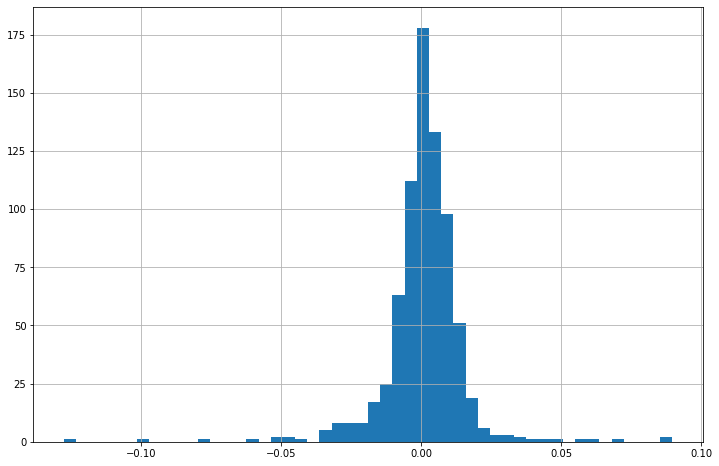

In [ ]:
spy_log_return.hist(bins=50, figsize=(12,8))

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(spy_log_return)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.792, p=0.000
Probably not Gaussian


In [ ]:
stocks_data

,CHFUSD_lrr,GOLD_lrr,EURUSD_lrr,BRENT_lrr,GAS_lrr,PL_lrr,RUBUSD_lrr,SPY_lrr
<DATE>,,,,,,,,
03/01/19,0.002473,0.004094,0.004652,0.015786,0.004803,0.009322,0.003656,-0.025068
04/01/19,0.001284,-0.008516,0.000377,0.033109,0.037284,0.022267,0.013339,0.033759
07/01/19,0.006982,-0.006752,0.006802,-0.003641,0.010373,-0.009521,0.015553,0.006986
08/01/19,-0.001765,-0.000545,-0.003194,0.017562,-0.001666,0.000968,-0.004553,0.009649
09/01/19,0.008212,0.010618,0.009907,0.045868,-0.003675,0.005189,0.002413,0.004090
...,...,...,...,...,...,...,...,...
27/12/21,0.001928,0.002761,0.000574,0.032578,0.029549,-0.001651,-0.000736,0.013744
28/12/21,0.000028,-0.003315,-0.001457,0.002541,-0.001224,0.009456,-0.003687,-0.001011
29/12/21,0.003553,-0.001107,0.004049,0.004810,-0.054108,-0.009973,-0.004888,0.001401


In [ ]:
# Anova Test
from scipy import stats
from statsmodels.stats import weightstats as stests
F, p = stats.f_oneway(stocks_data['SPY_lrr'],stocks_data['GOLD_lrr'], stocks_data['GAS_lrr'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.8688157804263602
accept null hypothesis


# Correlation test

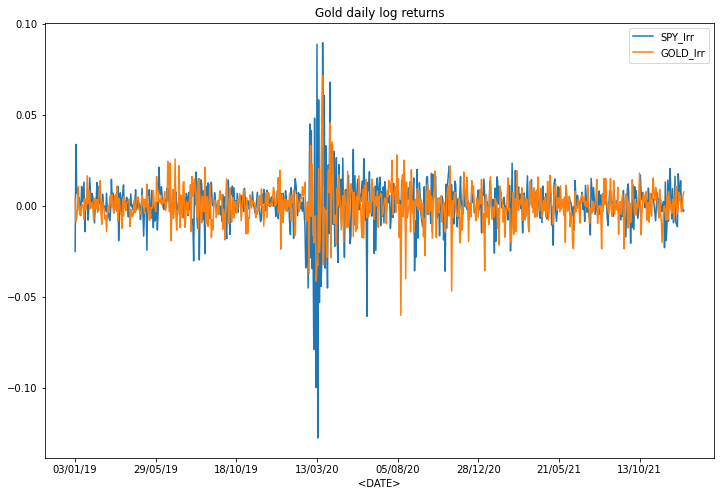

In [ ]:
stocks_data['SPY_lrr'].plot(title='S&P 500 daily log returns', legend=True, figsize=(12,8))
stocks_data['GOLD_lrr'].plot(title='Gold daily log returns', legend=True, figsize=(12,8))

In [ ]:
from scipy.stats.stats import pearsonr
corr, p = pearsonr(stocks_data['SPY_lrr'],stocks_data['GOLD_lrr'])
print("p-value for significance is: ", p)
print("correlation is: ", corr)


p-value for significance is:  3.314217905408008e-05
correlation is:  0.15035033069076756


## Проверка связи двух категориальных признаков

In [ ]:
df = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})

In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(index=df['Country'], columns=df['Product'])
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=2.750, p=0.600
Probably independent


# Теперь давайте сами

In [8]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime

In [2]:
aapl_stock_price_data = web.DataReader('AAPL', 'yahoo', '2014-09-17', '2022-08-06')

In [3]:
btc_price_data = web.DataReader('BTC-USD', 'yahoo', '2010-01-01', '2022-08-06')

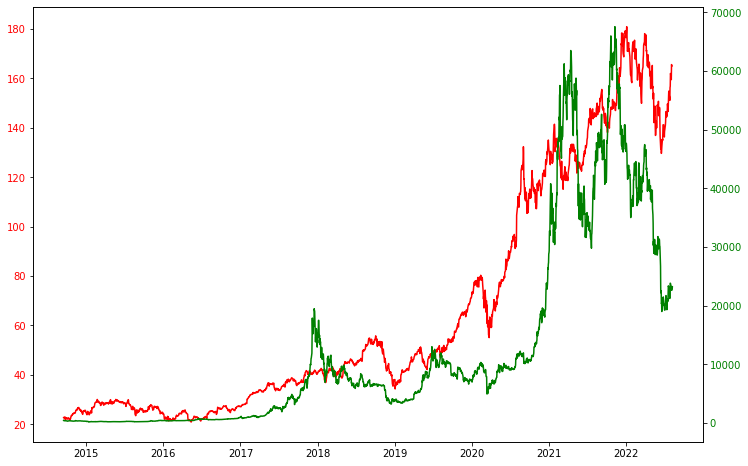

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot linear sequence, and set tick labels to the same color
ax.plot(aapl_stock_price_data['Adj Close'], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(btc_price_data['Adj Close'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [ ]:
# на основе Adj Close извлеките логарифмическую доходность task1, ответ – мю и сигма
# проверьте распределение получившихся данных task2, ответ yes/no 
# возмонжо попробуйте их нормализовать task3, ответ – mu и sigma
# попробуйте предположить по подвыборке размером 634 дней среднее значение для обоих доходностей на уровне 90 95 99 – task 4, ответ – val + [a;b]
# проверьте корреляцию доходностей – task5, ответ – yes/no

In [5]:
# task1

#Логарифмическая доходность для aapl_stock_price_data
aapl_stock_price_data["logret"] = np.log(aapl_stock_price_data['Adj Close']) - np.log(aapl_stock_price_data['Adj Close'].shift(1))
aapl_stock_price_data_logret = aapl_stock_price_data["logret"].dropna()

#Логарифмическая доходность для btc_price_data
btc_price_data["logret"] = np.log(btc_price_data['Adj Close']) - np.log(btc_price_data['Adj Close'].shift(1))
btc_price_data_logret = btc_price_data["logret"].dropna()

task1_aapl_stock_price_data_mu = np.mean(aapl_stock_price_data_logret)
task1_aapl_stock_price_data_sigma = np.std(aapl_stock_price_data_logret)
print("Мю для логарифмической доходности aapl_stock_price_data: ", task1_aapl_stock_price_data_mu)
print("Сигма для логарифмической доходности aapl_stock_price_data: ", task1_aapl_stock_price_data_sigma)

task1_btc_price_data_mu = np.mean(btc_price_data_logret)
task1_btc_price_data_sigma = np.std(btc_price_data_logret)
print("Мю для логарифмической доходности btc_price_data: ", task1_btc_price_data_mu)
print("Сигма для логарифмической доходности btc_price_data: ", task1_btc_price_data_sigma)

Мю для логарифмической доходности aapl_stock_price_data:  0.0009981768816810946
Сигма для логарифмической доходности aapl_stock_price_data:  0.018433240750362755
Мю для логарифмической доходности btc_price_data:  0.0013625316939291335
Сигма для логарифмической доходности btc_price_data:  0.03907049354954439


In [6]:
# task2

from scipy.stats import shapiro

In [7]:
# Проверка гипотезы на нормальность распределения для btc_price_data
stat, p = shapiro(btc_price_data_logret)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('btc_price_data probably normal')
else:
	print('btc_price_data probably not normal')

stat=0.908, p=0.000
btc_price_data probably not normal


In [8]:
# task3

# Нормализация btc_price_data через StandardScaler
btc_price_data_norm_stand = (btc_price_data["logret"] - btc_price_data["logret"].mean()) / task1_btc_price_data_sigma
btc_price_data_logret_norm_stand = btc_price_data_norm_stand.dropna()

# Нормализация btc_price_data через MaxMin
btc_price_data_norm = (btc_price_data["logret"] - btc_price_data["logret"].min())/(btc_price_data["logret"].max() - btc_price_data["logret"].min())
btc_price_data_logret_norm = btc_price_data_norm.dropna()

task3_aapl_stock_price_data_mu = np.mean(btc_price_data_logret_norm_stand )
task3_aapl_stock_price_data_sigma = np.std(btc_price_data_logret_norm_stand )
print("Мю для нормализованной логарифмической доходности btc_price_data через StandardScaler: ", task3_aapl_stock_price_data_mu)
print("Сигма для нормализованной логарифмической доходности btc_price_data через StandardScaler: ", task3_aapl_stock_price_data_sigma)

task3_btc_price_data_mu = np.mean(btc_price_data_logret_norm)
task3_btc_price_data_sigma = np.std(btc_price_data_logret_norm)
print("Мю для нормализованной логарифмической доходности btc_price_data через MaxMin: ", task3_btc_price_data_mu)
print("Сигма для нормализованной логарифмической доходности btc_price_data через MaxMin: ", task3_btc_price_data_sigma)

Мю для нормализованной логарифмической доходности btc_price_data через StandardScaler:  -1.8497294405417394e-17
Сигма для нормализованной логарифмической доходности btc_price_data через StandardScaler:  1.0
Мю для нормализованной логарифмической доходности btc_price_data через MaxMin:  0.6756444082913678
Сигма для нормализованной логарифмической доходности btc_price_data через MaxMin:  0.05663628736852301


In [9]:
# task4

# Доверительные интервалы для btc_price_data
mean_btc_price_data_634 = np.mean(btc_price_data_logret.tail(634))

btc_price_data_bottom_90 = 0.0001 - 1.64*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))
btc_price_data_upper_90 = 0.0001 + 1.64*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))

btc_price_data_bottom_95 = 0.0001 - 1.96*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))
btc_price_data_upper_95 = 0.0001 + 1.96*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))

btc_price_data_bottom_99 = 0.0001 - 2.57*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))
btc_price_data_upper_99 = 0.0001 + 2.57*np.std(btc_price_data_logret.tail(634))/(np.sqrt(len(btc_price_data_logret.tail(634))))


print('634 days 90% confidence inverval for btc_price_data:', (btc_price_data_bottom_90, btc_price_data_upper_90))
print('634 days 95% confidence inverval for btc_price_data:', (btc_price_data_bottom_95, btc_price_data_upper_95))
print('634 days 99% confidence inverval for btc_price_data:', (btc_price_data_bottom_99, btc_price_data_upper_99))
print('Mean btc_price_data: ', mean_btc_price_data_634)

634 days 90% confidence inverval for btc_price_data: (-0.002483823459172004, 0.0026838234591720035)
634 days 95% confidence inverval for btc_price_data: (-0.0029879841341323944, 0.003187984134132394)
634 days 99% confidence inverval for btc_price_data: (-0.003949040420775639, 0.00414904042077564)
Mean btc_price_data:  0.0006141427319479162


In [10]:
# task5

from scipy.stats.stats import pearsonr
corr, p = pearsonr(aapl_stock_price_data_logret, btc_price_data_logret.sample(len(aapl_stock_price_data_logret)))
print("p-value for significance is: ", p)
print("correlation is: ", corr)

if p > 0.05:
  print("No correlation")
else:
   print("Correlation")

p-value for significance is:  0.08636237440836439
correlation is:  0.03850106899884968
No correlation


In [14]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : 0.0013625316939291335
        }, 
        'task1_sigma' : {
            "answer" : 0.03907049354954439
        }, 
        'task2_normal' : {
            'answer' : 'no'
        }, 
        'task3_mu' : {
            "answer" : -1.8497294405417394e-17
        }, 
        'task3_sigma' : {
            "answer" : 1.0
        }, 
        'task4_90' : {
            "answer" : 0.0001
        }, 
        'task4_90_int' : {
            "answer" : [-0.0019696807272240875, 0.00319796619111992]
        }, 
        'task4_95' : {
            "answer" : 0.0001
        }, 
        'task4_95_int' : {
            "answer" : [-0.002473841402184478, 0.0037021268660803104]
        }, 
        'task4_99' : {
            "answer" : 0.0001
        }, 
        'task4_99_int' : {
            "answer" : [-0.0034348976888277233, 0.004663183152723556]
        },
        'task5_corr' : {
            "answer" : "no"
        }
    }
}

In [11]:
!pip install virtualenv
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 6.8 MB/s 
     |████████████████████████████████| 468 kB 55.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import yaml

In [17]:
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)

tasks:
  task1_mu:
    answer: 0.0013625316939291335
  task1_sigma:
    answer: 0.03907049354954439
  task2_normal:
    answer: 'no'
  task3_mu:
    answer: -1.8497294405417394e-17
  task3_sigma:
    answer: 1.0
  task4_90:
    answer: 0.0001
  task4_90_int:
    answer:
    - -0.0019696807272240875
    - 0.00319796619111992
  task4_95:
    answer: 0.0001
  task4_95_int:
    answer:
    - -0.002473841402184478
    - 0.0037021268660803104
  task4_99:
    answer: 0.0001
  task4_99_int:
    answer:
    - -0.0034348976888277233
    - 0.004663183152723556
  task5_corr:
    answer: 'no'

